In [ ]:
#imports
import numpy as np
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import ast
import os
import math
from collections import defaultdict
from plotnine import *

# RAW RECIPES

### **General information**

In [ ]:
raw_recipes=pd.read_csv("/content/drive/MyDrive/food recipes/RAW_recipes.csv")
raw_recipes.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [ ]:
raw_recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            231636 non-null  object
 1   id              231637 non-null  int64 
 2   minutes         231637 non-null  int64 
 3   contributor_id  231637 non-null  int64 
 4   submitted       231637 non-null  object
 5   tags            231637 non-null  object
 6   nutrition       231637 non-null  object
 7   n_steps         231637 non-null  int64 
 8   steps           231637 non-null  object
 9   description     226658 non-null  object
 10  ingredients     231637 non-null  object
 11  n_ingredients   231637 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 21.2+ MB


In [ ]:
raw_recipes.shape

(231637, 12)

The **RAW-RECIPES** dataset has a total of 231,637 columns - which means so many recipes. They are described through 12 attributes, as follows: ::


*   **name** - recipe name, 230186 unique values
*   **id** - recipe id


*  **minutes** - cooking time for the recipes in minutes
*   **contributor** - id of the user that published the recipe


*   **submitted** - date published
*   **tags** -  tags through which this recipe can be found, 209115 unique values


*   **nutrition** - information on the nutritional value of this recipe
(calories, total fat, sugar, sodium, protein, saturated fat), 229318 unique values
*  **n_steps** - number of steps required for the recipe


*  **steps** -  recipe preparation steps, 231074 unique values
*   **description** - Description of the recipe, posted by the user who published the recipe


*   **ingredients** - listing the ingredients needed to cook the recipe
*   **n_ingredients** - number of ingredients needed to cook the recipe

### **Missing values**

In [ ]:
missing_values = raw_recipes.isnull().sum()
percentage = 100 * raw_recipes.isnull().sum() / len(raw_recipes)
missing_values_table = pd.concat([missing_values, percentage], axis=1)
missing_values_table.columns = ['Num. of missing values','% of missing values']
missing_values_table

,Num. of missing values,% of missing values
name,1,0.000432
id,0,0.000000
minutes,0,0.000000
contributor_id,0,0.000000
submitted,0,0.000000
tags,0,0.000000
nutrition,0,0.000000
n_steps,0,0.000000
steps,0,0.000000
description,4979,2.149484


When it comes to missing values, only one recipe name is missing, and 4979 recipe descriptions.

### **Submitted recipes per user**

In [ ]:
recipes_per_user=raw_recipes.groupby('contributor_id').size().reset_index()
recipes_per_user.columns=['User ID', "Total recipes"]
recipes_per_user.sort_values(by='Total recipes', inplace=True,ascending = False)
recipes_per_user.reset_index(drop=True, inplace=True)
recipes_per_user

,User ID,Total recipes
0,89831,3118
1,37779,2553
2,37449,2493
3,1533,1595
4,58104,1522
...,...,...
27921,344188,1
27922,344214,1
27923,344237,1
27924,344293,1


A total of 231,637 recipes were published by only 27,926 users, most of the published recipes were from the user with id: 89831, who posted 3118 recipes.

### **Most common words in recipes names**

In [ ]:
copy=raw_recipes.dropna(subset=['name']) #drop the row that has missing name value
copy.isnull().sum()

name                 0
id                   0
minutes              0
contributor_id       0
submitted            0
tags                 0
nutrition            0
n_steps              0
steps                0
description       4979
ingredients          0
n_ingredients        0
dtype: int64

In [ ]:
from collections import Counter

rows = copy.name.values #all the names of the recipes
words=[]
for row in rows:
  words.extend(row.split(" "))

#words is a list of all the containing words in recipes names

text_counter = Counter(words)
text_counter
Counter.most_common(text_counter)

[('', 72820),
 ('and', 30217),
 ('with', 26640),
 ('chicken', 22966),
 ('s', 19285),
 ('salad', 13299),
 ('sauce', 10075),
 ('cheese', 9745),
 ('chocolate', 9029),
 ('soup', 8859),
 ('cake', 8344),
 ('bread', 7074),
 ('cream', 6534),
 ('easy', 6445),
 ('pie', 6057),
 ('cookies', 6012),
 ('rice', 5736),
 ('potato', 5514),
 ('pork', 5430),
 ('beef', 5386),
 ('casserole', 5378),
 ('baked', 5275),
 ('lemon', 4677),
 ('apple', 4631),
 ('pot', 4531),
 ('butter', 4430),
 ('sweet', 4372),
 ('in', 4338),
 ('pasta', 4262),
 ('garlic', 4232),
 ('potatoes', 4187),
 ('tomato', 4111),
 ('the', 3982),
 ('for', 3829),
 ('shrimp', 3800),
 ('grilled', 3704),
 ('spinach', 3526),
 ('a', 3517),
 ('dip', 3483),
 ('roasted', 3473),
 ('banana', 3419),
 ('bean', 3393),
 ('muffins', 3389),
 ('style', 3364),
 ('crock', 3357),
 ('spicy', 3318),
 ('orange', 3255),
 ('creamy', 3175),
 ('green', 3063),
 ('stuffed', 3033),
 ('beans', 2940),
 ('peanut', 2889),
 ('red', 2847),
 ('corn', 2821),
 ('chili', 2809),
 ('low'

### **Number of steps (to make the recipe) per recipe**

In [ ]:
print ('Min steps required: ', raw_recipes['n_steps'].min())
print ('Max steps required: ', raw_recipes['n_steps'].max())
print ('Average steps required: ', raw_recipes['n_steps'].mean())

Min steps required:  0
Max steps required:  145
Average steps required:  9.7654994668382


### **Cooking time per recipe**

In [ ]:
print ('Min minutes required: ', raw_recipes['minutes'].min())
print ('Max minutes required: ', raw_recipes['minutes'].max())
print ('Average minutes required: ', raw_recipes['minutes'].mean())

Min minutes required:  0
Max minutes required:  2147483647
Average minutes required:  9398.546009488984


### **Number of ingredients per recipe**

In [ ]:
print ('Min number of ingredients required: ', raw_recipes['n_ingredients'].min())
print ('Max number of ingredients: ', raw_recipes['n_ingredients'].max())
print ('Average number of ingredients required: ', raw_recipes['n_ingredients'].mean())

Min number of ingredients required:  1
Max number of ingredients:  43
Average number of ingredients required:  9.051153313158087


# PP RECIPES

### **General information**

In [ ]:
pp_recipes = pd.read_csv("/content/drive/MyDrive/food recipes/PP_recipes.csv")
pp_recipes.head()

,id,i,name_tokens,ingredient_tokens,steps_tokens,techniques,calorie_level,ingredient_ids
0,424415,23,"[40480, 37229, 2911, 1019, 249, 6878, 6878, 28...","[[2911, 1019, 249, 6878], [1353], [6953], [153...","[40480, 40482, 21662, 481, 6878, 500, 246, 161...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[389, 7655, 6270, 1527, 3406]"
1,146223,96900,"[40480, 18376, 7056, 246, 1531, 2032, 40481]","[[17918], [25916], [2507, 6444], [8467, 1179],...","[40480, 40482, 729, 2525, 10906, 485, 43, 8393...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[2683, 4969, 800, 5298, 840, 2499, 6632, 7022,..."
2,312329,120056,"[40480, 21044, 16954, 8294, 556, 10837, 40481]","[[5867, 24176], [1353], [6953], [1301, 11332],...","[40480, 40482, 8240, 481, 24176, 296, 1353, 66...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",1,"[1257, 7655, 6270, 590, 5024, 1119, 4883, 6696..."
3,74301,168258,"[40480, 10025, 31156, 40481]","[[1270, 1645, 28447], [21601], [27952, 29471, ...","[40480, 40482, 5539, 21601, 1073, 903, 2324, 4...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[7940, 3609, 7060, 6265, 1170, 6654, 5003, 3561]"
4,76272,109030,"[40480, 17841, 252, 782, 2373, 1641, 2373, 252...","[[1430, 11434], [1430, 17027], [1615, 23, 695,...","[40480, 40482, 14046, 1430, 11434, 488, 17027,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[3484, 6324, 7594, 243]"


In [ ]:
pp_recipes.shape

(178265, 8)

This dataset also applies to recipes, but in this case the data is preprocessed. Unlike the first set in this dataset we have 178265 recipes, and 8 attributes with which they are described.

*   **id** - recipe id 
*   **i** - recipe identifier mapped to numbers starting with 0

*   **name_tokens** - recipe names - but tokenized

*   **ingredient_tokens** - tokenized list of groceries needed for the recipe (list of lists)

*   **steps_tokens** - tokenized steps required to prepare the recipe
*   **techniques** - list of techniques used in the recipe


*   **calorie_level** - caloric level, in ascending order


*   **ingredient_ids** - id of groceries in the recipe

### **Missing values**

In [ ]:
missing_values = pp_recipes.isnull().sum()
percentage = 100 * pp_recipes.isnull().sum() / len(pp_recipes)
missing_values_table = pd.concat([missing_values, percentage], axis=1)
missing_values_table.columns = ['Num. of missing values','% of missing values']
missing_values_table

,Num. of missing values,% of missing values
id,0,0.0
i,0,0.0
name_tokens,0,0.0
ingredient_tokens,0,0.0
steps_tokens,0,0.0
techniques,0,0.0
calorie_level,0,0.0
ingredient_ids,0,0.0


As this data is already pre-processed, there is no missing data in it.

### **Recipes per calorie level**

In [ ]:
recipes_per_calorie_level=pp_recipes.groupby('calorie_level').size().reset_index()
recipes_per_calorie_level.columns=['Calorie level', "Total recipes"]
recipes_per_calorie_level.sort_values(by='Total recipes', inplace=True,ascending = False)
recipes_per_calorie_level.reset_index(drop=True, inplace=True)
recipes_per_calorie_level

,Calorie level,Total recipes
0,0,69699
1,1,63255
2,2,45311


Most of the recipes with low caloric value, and the smallest with high.


### **Visualization**

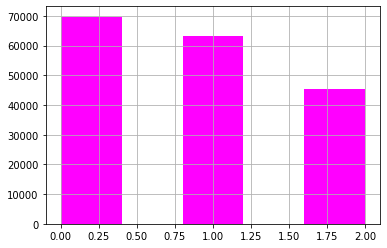

In [ ]:
pp_recipes['calorie_level'].hist(bins=5, color='magenta')

# PP USERS

### **General information**

In [ ]:
users = pd.read_csv("/content/drive/MyDrive/food recipes/PP_users.csv")
users.head()

,u,techniques,items,n_items,ratings,n_ratings
0,0,"[8, 0, 0, 5, 6, 0, 0, 1, 0, 9, 1, 0, 0, 0, 1, ...","[1118, 27680, 32541, 137353, 16428, 28815, 658...",31,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0, ...",31
1,1,"[11, 0, 0, 2, 12, 0, 0, 0, 0, 14, 5, 0, 0, 0, ...","[122140, 77036, 156817, 76957, 68818, 155600, ...",39,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...",39
2,2,"[13, 0, 0, 7, 5, 0, 1, 2, 1, 11, 0, 1, 0, 0, 1...","[168054, 87218, 35731, 1, 20475, 9039, 124834,...",27,"[3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, ...",27
3,3,"[498, 13, 4, 218, 376, 3, 2, 33, 16, 591, 10, ...","[163193, 156352, 102888, 19914, 169438, 55772,...",1513,"[5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 5.0, 5.0, ...",1513
4,4,"[161, 1, 1, 86, 93, 0, 0, 11, 2, 141, 0, 16, 0...","[72857, 38652, 160427, 55772, 119999, 141777, ...",376,"[5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 4.0, 5.0, ...",376


In [ ]:
users.shape

(25076, 6)

In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25076 entries, 0 to 25075
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   u           25076 non-null  int64 
 1   techniques  25076 non-null  object
 2   items       25076 non-null  object
 3   n_items     25076 non-null  int64 
 4   ratings     25076 non-null  object
 5   n_ratings   25076 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 1.1+ MB


We have a total of 25,076 users who are described by the following attributes:

*  **u** - an integer value denoting the user id, starting with 0
*  **techniques** - a list of techniques that the user has encountered
*  **items** - list of id of all recipes with which the user interacted (prepared)
*  **n_items** - on how many of the recipes, the user left some review
*  **ratings** - rrating left on each of the recipes the user prepared
*  **num_ratings** - how many total ratings we have for each user

### **Missing values**

In [ ]:
missing_values = users.isnull().sum()
percentage = 100 * users.isnull().sum() / len(users)
missing_values_table = pd.concat([missing_values, percentage], axis=1)
missing_values_table.columns = ['Num. of missing values','% of missing values']
missing_values_table

,Num. of missing values,% of missing values
u,0,0.0
techniques,0,0.0
items,0,0.0
n_items,0,0.0
ratings,0,0.0
n_ratings,0,0.0


There are no missing values ​​in this data set.

### **Ratings**

In [ ]:
users_copy = users.copy(deep=True)
users_copy['ratings'].replace("\'", "", regex=True, inplace=True)
users_copy['ratings'].replace("\[", "", regex=True, inplace=True)
users_copy['ratings'].replace("\]", "", regex=True, inplace=True)
users_copy['ratings'].replace("\,", "", regex=True, inplace=True)

users_copy['mean_rating'] = [np.array(x.split(" ")).astype(np.float).mean() for x in users_copy.ratings.values]
users_copy['min_rating'] = [np.array(x.split(" ")).astype(np.float).min() for x in users_copy.ratings.values]
users_copy['max_rating'] = [np.array(x.split(" ")).astype(np.float).max() for x in users_copy.ratings.values]

user_ratings = users_copy[["u","min_rating", "max_rating", "mean_rating", "n_ratings"]]
user_ratings

,u,min_rating,max_rating,mean_rating,n_ratings
0,0,4.0,5.0,4.806452,31
1,1,4.0,5.0,4.948718,39
2,2,3.0,5.0,4.222222,27
3,3,0.0,5.0,4.821547,1513
4,4,0.0,5.0,4.388298,376
...,...,...,...,...,...
25071,25071,5.0,5.0,5.000000,2
25072,25072,5.0,5.0,5.000000,2
25073,25073,5.0,5.0,5.000000,2
25074,25074,5.0,5.0,5.000000,2


### **Visualization**

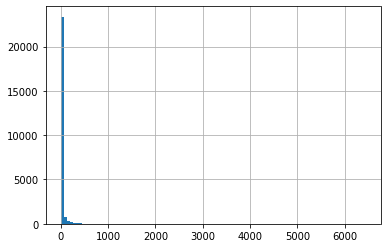

In [ ]:
users['n_items'].hist(bins=100)

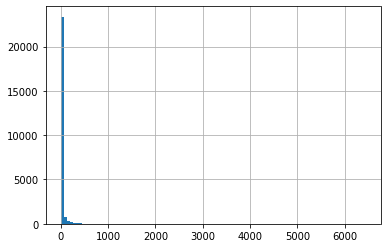

In [ ]:
users['n_ratings'].hist(bins=100)

In [ ]:
df = user_ratings.groupby(['min_rating', "max_rating"])['u'].count().reset_index()
df.columns = ["Min Rating", "Max Rating", "Users"]
df

,Min Rating,Max Rating,Users
0,0.0,0.0,115
1,0.0,1.0,21
2,0.0,2.0,18
3,0.0,3.0,27
4,0.0,4.0,128
5,0.0,5.0,6510
6,1.0,1.0,3
7,1.0,2.0,7
8,1.0,3.0,4
9,1.0,4.0,42


In [ ]:
import plotly.express as px

fig = px.bar(
    df, 
    x='Min Rating', 
    y="Users", 
    color = 'Max Rating',
    barmode='group',
    orientation='v', 
    title='How many users have the same min and max rating', 
    width=800,
    height=700
)
fig.show()

# INTERACTIONS (TRAIN, TEST & VALIDATION)

### **General information**

In [ ]:
interactions_test=pd.read_csv("/content/drive/MyDrive/food recipes/interactions_test.csv")
interactions_test.head()


,user_id,recipe_id,date,rating,u,i
0,8937,44551,2005-12-23,4.0,2,173538
1,56680,126118,2006-10-07,4.0,16,177847
2,349752,219596,2008-04-12,0.0,26,89896
3,628951,82783,2007-11-13,2.0,45,172637
4,92816,435013,2013-07-31,3.0,52,177935


In [ ]:
interactions_train=pd.read_csv("/content/drive/MyDrive/food recipes/interactions_train.csv")
interactions_train.head()

,user_id,recipe_id,date,rating,u,i
0,2046,4684,2000-02-25,5.0,22095,44367
1,2046,517,2000-02-25,5.0,22095,87844
2,1773,7435,2000-03-13,5.0,24732,138181
3,1773,278,2000-03-13,4.0,24732,93054
4,2046,3431,2000-04-07,5.0,22095,101723


In [ ]:
interactions_validation=pd.read_csv("/content/drive/MyDrive/food recipes/interactions_validation.csv")
interactions_validation.head()

,user_id,recipe_id,date,rating,u,i
0,76535,33627,2005-02-15,4.0,5,177317
1,160497,75307,2005-10-24,4.0,23,170785
2,930021,100961,2008-11-30,4.0,31,165555
3,58439,154105,2007-03-24,4.0,44,177453
4,628951,14525,2008-02-16,5.0,45,142367


In [ ]:
interactions_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12455 entries, 0 to 12454
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    12455 non-null  int64  
 1   recipe_id  12455 non-null  int64  
 2   date       12455 non-null  object 
 3   rating     12455 non-null  float64
 4   u          12455 non-null  int64  
 5   i          12455 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 584.0+ KB


Atributes:

**user_id** - user Id

**recipe_id** - recipe Id

**date** - date of interaction

**rating** - raiting for the recipe

**u** - user id mapped in integer starting with 0

**i** - recipe id mapped in integer starting with 0

### **Visualization**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7fc4dc0fd0>,
      dtype=object)

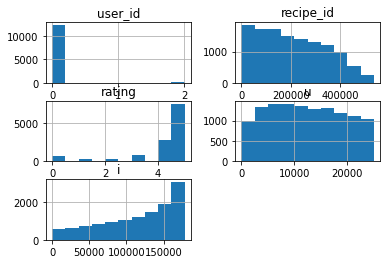

In [ ]:
interactions_test.hist()

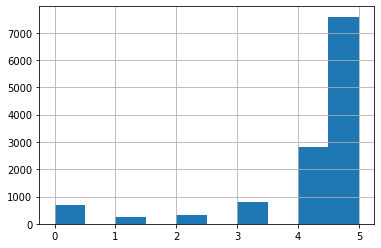

In [ ]:
interactions_test["rating"].hist()

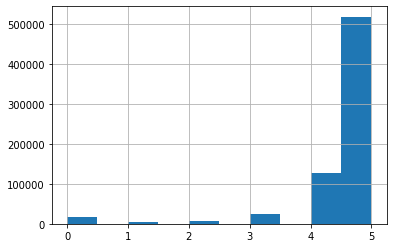

In [ ]:
interactions_train["rating"].hist()

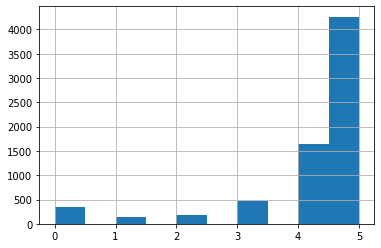

In [ ]:
interactions_validation["rating"].hist()

Most recipes get good reviews.


In [ ]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

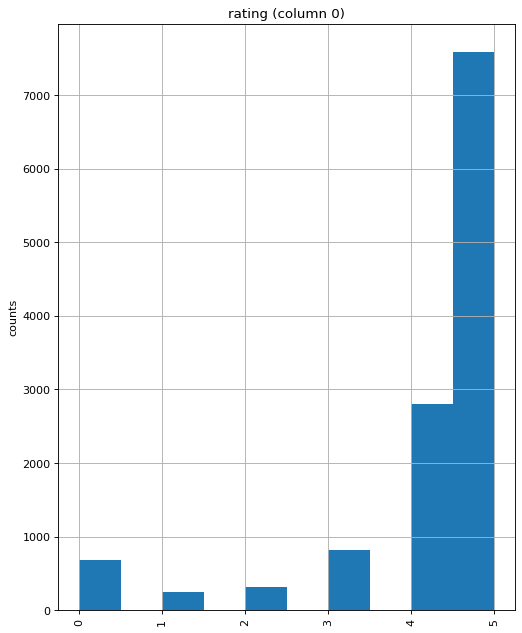

In [ ]:
plotPerColumnDistribution(interactions_test, 10, 5)

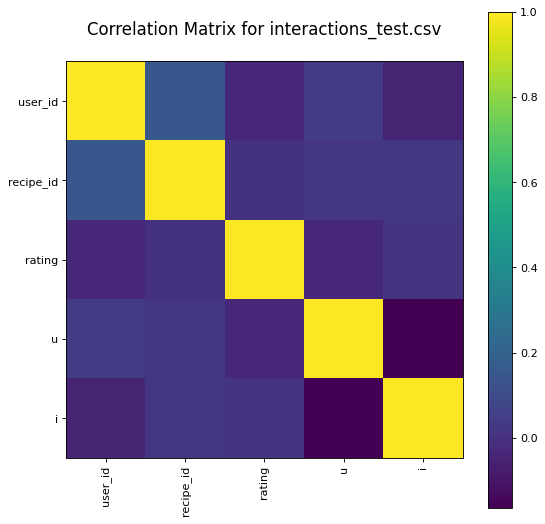

In [ ]:
interactions_test.dataframeName = 'interactions_test.csv'
plotCorrelationMatrix(interactions_test, 8)

The biggest connection is between the user_id and recipe_id columns.

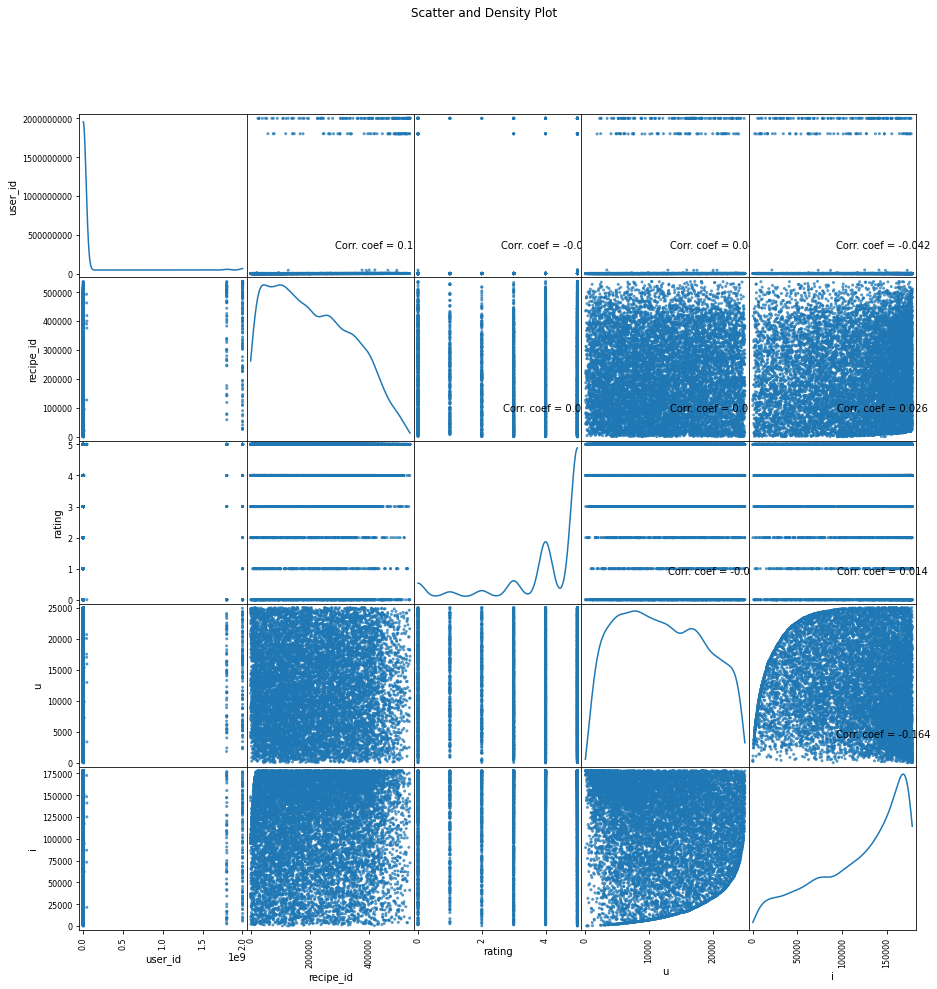

In [ ]:
plotScatterMatrix(interactions_test, 15, 10)

# EDA ON INGREDIENTS

In [ ]:
raw_interactions = pd.read_csv("/content/drive/MyDrive/food recipes/RAW_interactions.csv")

In [ ]:
recipes = pp_recipes.merge(right=raw_recipes, left_on="id", right_on="id")

recipes = recipes[["id", "name", "submitted", "ingredient_ids", "ingredients", "n_ingredients"]] 

recipes = recipes.rename({"id":"recipe_id"}, axis="columns") #rename for further merges

recipes.head()

,recipe_id,name,submitted,ingredient_ids,ingredients,n_ingredients
0,424415,aromatic basmati rice rice cooker,2010-05-10,"[389, 7655, 6270, 1527, 3406]","['basmati rice', 'water', 'salt', 'cinnamon st...",5
1,146223,pumpkin pie a la easy,2005-11-25,"[2683, 4969, 800, 5298, 840, 2499, 6632, 7022,...","['flour', 'oats', 'brown sugar', 'pecans', 'bu...",12
2,312329,cheesy tomato soup with potatoes,2008-07-07,"[1257, 7655, 6270, 590, 5024, 1119, 4883, 6696...","['chicken broth', 'water', 'salt', 'black pepp...",15
3,74301,mini tacos,2003-10-29,"[7940, 3609, 7060, 6265, 1170, 6654, 5003, 3561]","['wonton wrappers', 'hamburger', 'taco seasoni...",8
4,76272,rosemary s hanky panky s,2003-11-12,"[3484, 6324, 7594, 243]","['ground beef', 'ground sausage', 'velveeta ch...",4


In [ ]:
interactions = raw_interactions[["user_id", "recipe_id", "rating", "review"]]
interactions.head(15)

,user_id,recipe_id,rating,review
0,38094,40893,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,4,This worked very well and is EASY. I used not...
3,126440,85009,5,I made the Mexican topping and took it to bunk...
4,57222,85009,5,"Made the cheddar bacon topping, adding a sprin..."
5,52282,120345,4,very very sweet. after i waited the 2 days i b...
6,124416,120345,0,"Just an observation, so I will not rate. I fo..."
7,2000192946,120345,2,This recipe was OVERLY too sweet. I would sta...
8,76535,134728,4,Very good!
9,273745,134728,5,Better than the real!!


In [ ]:
raw_interactions['review'].value_counts().unique

<bound method Series.unique of Delicious!                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               309
Excellent!                                                                                                                                                                                                                                                                                                  

In [ ]:
ingr_map = pd.read_pickle("/content/drive/MyDrive/food recipes/ingr_map.pkl")


ingr_df = ingr_map.copy(deep=True)
ingr_df = ingr_df.rename({"id":"ingr_id","replaced":"ingr_name"}, axis="columns")
ingr_df = ingr_df[["ingr_id", "ingr_name"]]
ingr_df = ingr_df.drop_duplicates(ignore_index=True)
ingr_df.head(10)

,ingr_id,ingr_name
0,4308,lettuce
1,2744,french vanilla pudding and pie filling mix
2,6843,stove top stuffing mix
3,1910,cream cheese
4,1168,cheddar
5,5811,radicchio
6,5205,pasta sauce
7,7233,tomato sauce
8,6482,shredded three cheese
9,4836,mozzarella


Each row in this set refers to a separate ingredient.

### **Ingredients frequency**

In [ ]:
recipes_exploded = recipes.copy(deep=True)
recipes_exploded["ingredient_ids"] = recipes_exploded['ingredient_ids'].apply(lambda x : ast.literal_eval(x))
recipes_exploded = recipes_exploded.explode(column="ingredient_ids", ignore_index=True)
recipes_exploded.head(10)

,recipe_id,name,submitted,ingredient_ids,ingredients,n_ingredients
0,424415,aromatic basmati rice rice cooker,2010-05-10,389,"['basmati rice', 'water', 'salt', 'cinnamon st...",5
1,424415,aromatic basmati rice rice cooker,2010-05-10,7655,"['basmati rice', 'water', 'salt', 'cinnamon st...",5
2,424415,aromatic basmati rice rice cooker,2010-05-10,6270,"['basmati rice', 'water', 'salt', 'cinnamon st...",5
3,424415,aromatic basmati rice rice cooker,2010-05-10,1527,"['basmati rice', 'water', 'salt', 'cinnamon st...",5
4,424415,aromatic basmati rice rice cooker,2010-05-10,3406,"['basmati rice', 'water', 'salt', 'cinnamon st...",5
5,146223,pumpkin pie a la easy,2005-11-25,2683,"['flour', 'oats', 'brown sugar', 'pecans', 'bu...",12
6,146223,pumpkin pie a la easy,2005-11-25,4969,"['flour', 'oats', 'brown sugar', 'pecans', 'bu...",12
7,146223,pumpkin pie a la easy,2005-11-25,800,"['flour', 'oats', 'brown sugar', 'pecans', 'bu...",12
8,146223,pumpkin pie a la easy,2005-11-25,5298,"['flour', 'oats', 'brown sugar', 'pecans', 'bu...",12
9,146223,pumpkin pie a la easy,2005-11-25,840,"['flour', 'oats', 'brown sugar', 'pecans', 'bu...",12


Each row represents a specific ingredient in a specific recipe. Next I want to group by ingredient to see how often it appears in recipes.


In [ ]:
ingr_df["num_recipes"] = ingr_df["ingr_id"].map(dict(recipes_exploded.groupby("ingredient_ids")["recipe_id"].size()))

total_number_of_recipes = recipes["recipe_id"].unique().size
ingr_df["frequency"] = ingr_df["num_recipes"]/total_number_of_recipes

ingr_df = ingr_df.dropna() #in case there are ingredients that are not used in any recipe

ingr_df.head(10)

,ingr_id,ingr_name,num_recipes,frequency
0,4308,lettuce,4294.0,0.024088
1,2744,french vanilla pudding and pie filling mix,4.0,0.000022
2,6843,stove top stuffing mix,106.0,0.000595
3,1910,cream cheese,8966.0,0.050296
4,1168,cheddar,12300.0,0.068998
5,5811,radicchio,83.0,0.000466
6,5205,pasta sauce,412.0,0.002311
7,7233,tomato sauce,3637.0,0.020402
9,4836,mozzarella,4878.0,0.027364
10,912,cake mix,2344.0,0.013149


In [ ]:
tmp = ingr_df.copy()
tmp.drop(['ingr_id', 'num_recipes'], axis='columns', inplace=True)

In [ ]:
tmp.head()

,ingr_name,frequency
0,lettuce,0.024088
1,french vanilla pudding and pie filling mix,0.000022
2,stove top stuffing mix,0.000595
3,cream cheese,0.050296
4,cheddar,0.068998


### **Rating per recipe with given ingredient**

In [ ]:
interactions_exploded = interactions.copy(deep=True)
interactions_exploded = interactions_exploded.merge(how="left", right=recipes[["recipe_id","ingredient_ids"]], left_on="recipe_id", right_on="recipe_id")
interactions_exploded = interactions_exploded.dropna()
interactions_exploded["ingredient_ids"] = interactions_exploded['ingredient_ids'].apply(lambda x : ast.literal_eval(x))
interactions_exploded = interactions_exploded.explode(column="ingredient_ids", ignore_index=True)

interactions_exploded.head(10)

,user_id,recipe_id,rating,review,ingredient_ids
0,38094,40893,4,Great with a salad. Cooked on top of stove for...,3384
1,38094,40893,4,Great with a salad. Cooked on top of stove for...,7979
2,38094,40893,4,Great with a salad. Cooked on top of stove for...,2127
3,38094,40893,4,Great with a salad. Cooked on top of stove for...,3502
4,38094,40893,4,Great with a salad. Cooked on top of stove for...,3217
5,38094,40893,4,Great with a salad. Cooked on top of stove for...,1257
6,38094,40893,4,Great with a salad. Cooked on top of stove for...,2778
7,38094,40893,4,Great with a salad. Cooked on top of stove for...,5006
8,38094,40893,4,Great with a salad. Cooked on top of stove for...,6654
9,1293707,40893,5,"So simple, so delicious! Great for chilly fall...",3384


In [ ]:
ingr_df["mean_rating"] = ingr_df["ingr_id"].map(dict(interactions_exploded.groupby("ingredient_ids")["rating"].mean()))
ingr_df["num_ratings"] = ingr_df["ingr_id"].map(dict(interactions_exploded.groupby("ingredient_ids")["rating"].size()))
ingr_df.head(10)

,ingr_id,ingr_name,num_recipes,frequency,mean_rating,num_ratings
0,4308,lettuce,4294.0,0.024088,4.553558,17859
1,2744,french vanilla pudding and pie filling mix,4.0,0.000022,4.400000,5
2,6843,stove top stuffing mix,106.0,0.000595,4.261090,789
3,1910,cream cheese,8966.0,0.050296,4.470405,50937
4,1168,cheddar,12300.0,0.068998,4.434023,72851
5,5811,radicchio,83.0,0.000466,4.567010,194
6,5205,pasta sauce,412.0,0.002311,4.461032,1976
7,7233,tomato sauce,3637.0,0.020402,4.416130,23918
9,4836,mozzarella,4878.0,0.027364,4.489368,25960
10,912,cake mix,2344.0,0.013149,4.458136,13317


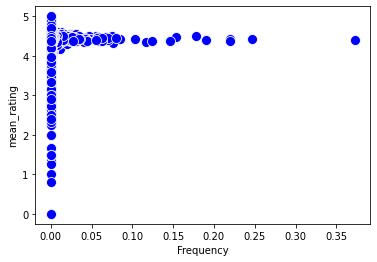

In [ ]:
ax = sns.scatterplot(data=ingr_df, x="frequency", y="mean_rating", color="blue", s=100)
ax.set_xlabel("Frequency")
plt.show()

### **Rare ingredients**

In [ ]:
threshold = 5
rare_ingredients = ingr_df.loc[ingr_df["num_recipes"] <= threshold, "ingr_id"].values
recipes_exploded["rare_ingr"] = recipes_exploded["ingredient_ids"].map(lambda x: x in rare_ingredients)
recipes_exploded.head(10)

,recipe_id,name,submitted,ingredient_ids,ingredients,n_ingredients,rare_ingr
0,424415,aromatic basmati rice rice cooker,2010-05-10,389,"['basmati rice', 'water', 'salt', 'cinnamon st...",5,False
1,424415,aromatic basmati rice rice cooker,2010-05-10,7655,"['basmati rice', 'water', 'salt', 'cinnamon st...",5,False
2,424415,aromatic basmati rice rice cooker,2010-05-10,6270,"['basmati rice', 'water', 'salt', 'cinnamon st...",5,False
3,424415,aromatic basmati rice rice cooker,2010-05-10,1527,"['basmati rice', 'water', 'salt', 'cinnamon st...",5,False
4,424415,aromatic basmati rice rice cooker,2010-05-10,3406,"['basmati rice', 'water', 'salt', 'cinnamon st...",5,False
5,146223,pumpkin pie a la easy,2005-11-25,2683,"['flour', 'oats', 'brown sugar', 'pecans', 'bu...",12,False
6,146223,pumpkin pie a la easy,2005-11-25,4969,"['flour', 'oats', 'brown sugar', 'pecans', 'bu...",12,False
7,146223,pumpkin pie a la easy,2005-11-25,800,"['flour', 'oats', 'brown sugar', 'pecans', 'bu...",12,False
8,146223,pumpkin pie a la easy,2005-11-25,5298,"['flour', 'oats', 'brown sugar', 'pecans', 'bu...",12,False
9,146223,pumpkin pie a la easy,2005-11-25,840,"['flour', 'oats', 'brown sugar', 'pecans', 'bu...",12,False


In [ ]:
recipes["num_rare_ingr"] = recipes["recipe_id"].map(dict(recipes_exploded.groupby("recipe_id")["rare_ingr"].sum()))
recipes.head(10)

,recipe_id,name,submitted,ingredient_ids,ingredients,n_ingredients,num_rare_ingr
0,424415,aromatic basmati rice rice cooker,2010-05-10,"[389, 7655, 6270, 1527, 3406]","['basmati rice', 'water', 'salt', 'cinnamon st...",5,0
1,146223,pumpkin pie a la easy,2005-11-25,"[2683, 4969, 800, 5298, 840, 2499, 6632, 7022,...","['flour', 'oats', 'brown sugar', 'pecans', 'bu...",12,0
2,312329,cheesy tomato soup with potatoes,2008-07-07,"[1257, 7655, 6270, 590, 5024, 1119, 4883, 6696...","['chicken broth', 'water', 'salt', 'black pepp...",15,0
3,74301,mini tacos,2003-10-29,"[7940, 3609, 7060, 6265, 1170, 6654, 5003, 3561]","['wonton wrappers', 'hamburger', 'taco seasoni...",8,0
4,76272,rosemary s hanky panky s,2003-11-12,"[3484, 6324, 7594, 243]","['ground beef', 'ground sausage', 'velveeta ch...",4,0
5,465171,pink bavarian crown strawberry dream supreme,2011-09-29,"[6861, 7655, 6846, 6906, 1789, 131, 6863, 1833...","['strawberry jell-o gelatin dessert', 'water',...",10,0
6,163861,tom and kelly s chicken fried steak,2006-04-11,"[5574, 2683, 6270, 5319, 2499, 869, 1278, 4987...","['boneless pork chops', 'flour', 'salt', 'pepp...",9,0
7,186383,chocolate oat cookie bars,2006-09-15,"[2683, 4969, 332, 335, 6270, 800, 4987, 7470, ...","['flour', 'oats', 'baking powder', 'baking sod...",10,0
8,116395,tropical lemon cream bars,2005-04-12,"[2683, 1689, 5687, 1098, 840, 7782, 7011, 1910...","['flour', ""confectioners' sugar"", 'powdered mi...",13,0
9,303460,jeera on cubes barbecue marinade,2008-05-13,"[6413, 7997, 3148, 3710, 1799, 2007, 3203, 265...","['sesame oil', 'yoghurt', 'fruit vinegar', 'ho...",9,1


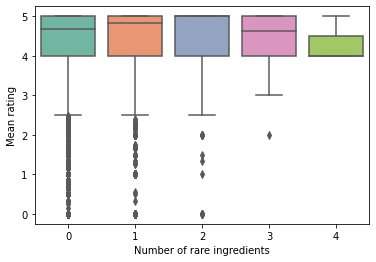

In [ ]:
recipes["mean_rating"] = recipes["recipe_id"].map(dict(interactions.groupby("recipe_id")["rating"].mean()))

sns.set_palette(sns.color_palette("Set2", 8))
ax = sns.boxplot(data=recipes, x="num_rare_ingr", y="mean_rating")
ax.set_xlabel("Number of rare ingredients")
ax.set_ylabel("Mean rating")
plt.show()